In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv(r'C:\Users\Rog\Desktop\Housing\train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check Nulls

<AxesSubplot:>

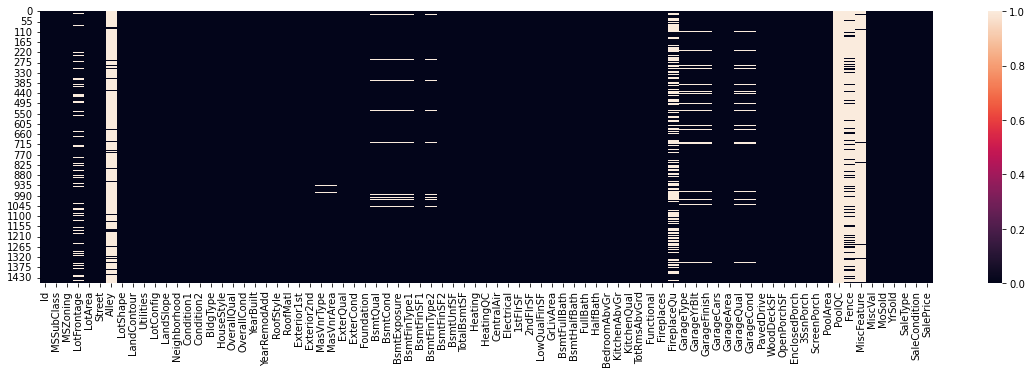

In [7]:
plt.figure(figsize=(20,5))

sns.heatmap(housing.isnull())

<AxesSubplot:>

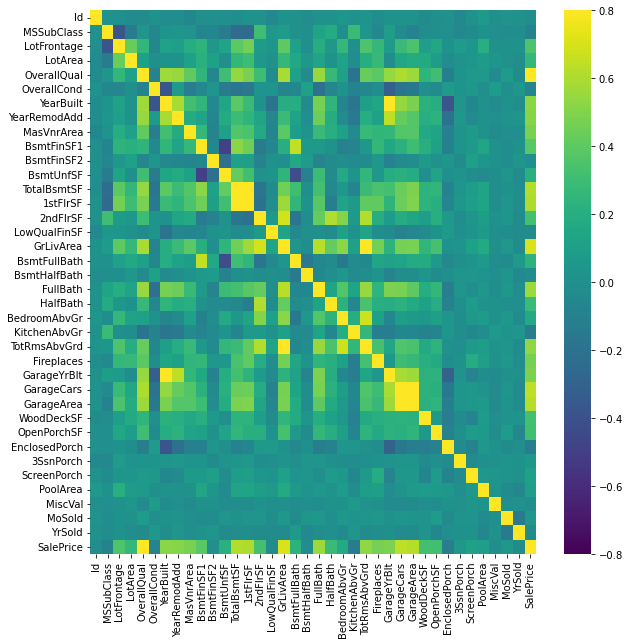

In [8]:
# Check Corr
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(), cmap='viridis', vmin = -0.8, vmax = 0.8 )

In [9]:
# Lets see the columns with nulls with respective number of nulls and follow one by one
housing.isnull().sum()[housing.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
# There are only 7 houses which have a pool, their conditions are "Fair" or above (so not much difference),
# also correlation is weak between SalePrice and 'PoolArea'. We can either remove or add hasPool column instead of the 2 pool
# related columns
housing['PoolQC'][housing['PoolArea'] > 0]

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [11]:
# For MiscFeature I think we can do the same - add hasMiscFeature
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [12]:
# Alley - NA means No Alley - so we can do the same
# (we could also do encoding here but too many nulls)
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
# Fence - NA means No Fence - so we can do the same
# (we could also do encoding here but too many nulls)
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

<AxesSubplot:>

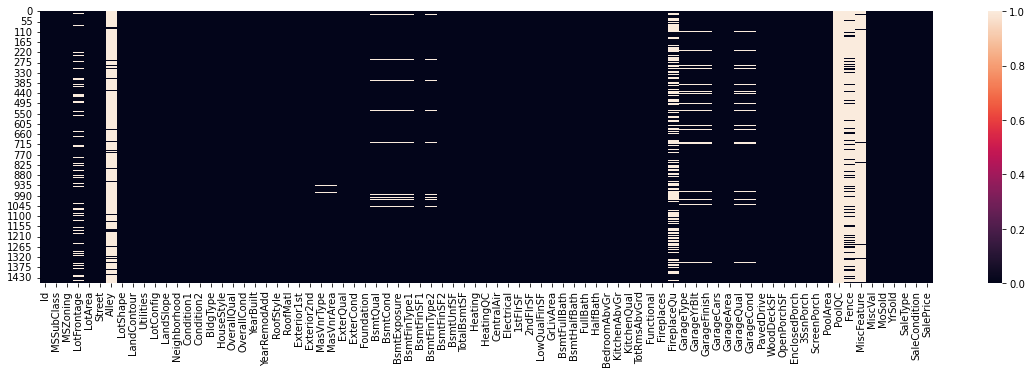

In [14]:
plt.figure(figsize=(20,5))

sns.heatmap(housing.isnull(), vmin = 0, vmax = 1)

In [15]:
def print_sales_corr(df):

    salescorr = df.corr()['SalePrice']

    corr = pd.DataFrame({'Col' : salescorr.index, 'Val' : np.round(salescorr.values,2)})
    corr.sort_values('Val',ascending = False, inplace = True)

    plt.figure(figsize=(10,10))
    sns.barplot(data = corr, x = 'Val', y = 'Col')

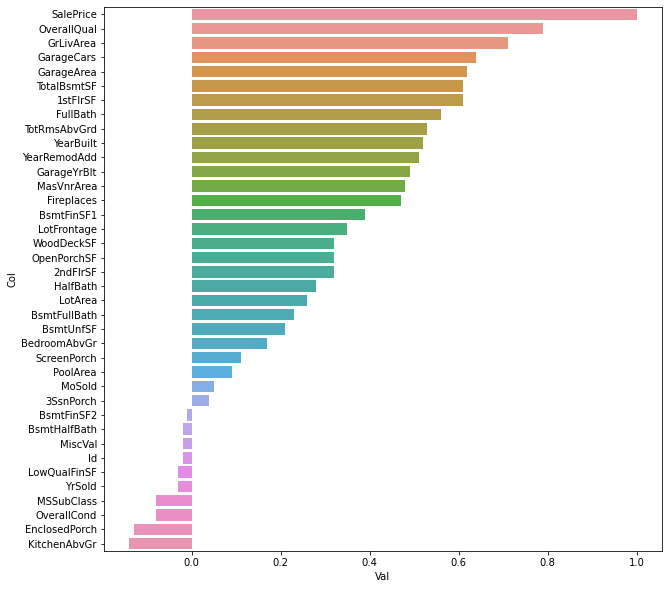

In [16]:
print_sales_corr(housing)

<AxesSubplot:>

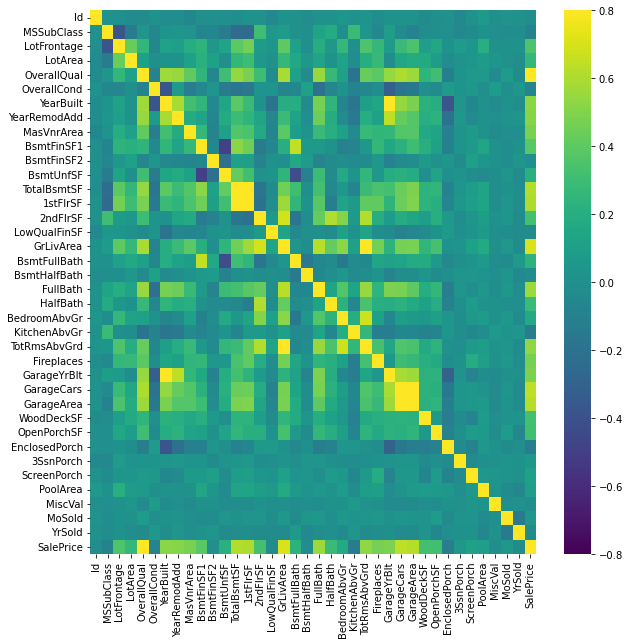

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(), cmap='viridis', vmin = -0.8, vmax = 0.8 )

In [18]:
# Remove highly correlated fields

# 1. GarageCars and GarageArea are basically the same, Cars is more correlated so we can leave GarageCars
# 2. Same with TotalBsmtSF and 1stFlrSF - leave TotalBsmtSF
# 3. YearBuilt - YearRemodelled - Leave YearBuilt
# 4. TotRmsAbvGround - GrLiveArea - Leave GrLiveArea
# 5. BsmtFinSF1 - BsmtUnfSF - Leave BsmtFinSF1
# 6. BsmtFullBath - BsmtFinSf1 - Leave BsmtFinSF1

C:\Users\Rog\AppData\Local\Temp/ipykernel_14572/2196535136.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


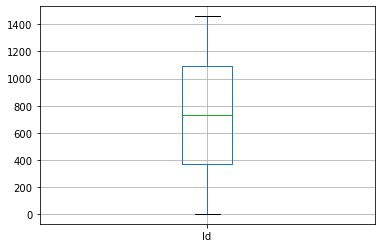

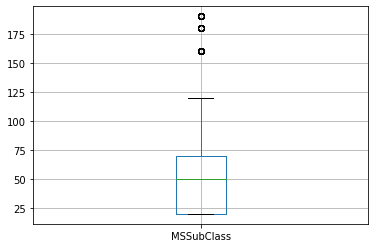

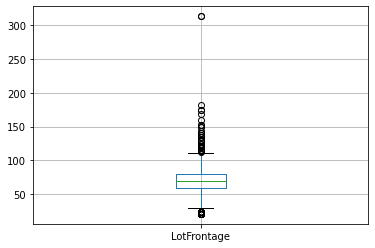

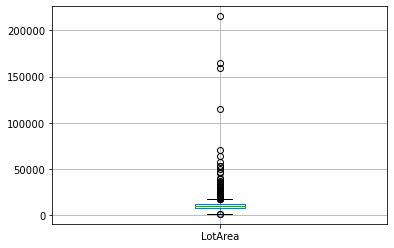

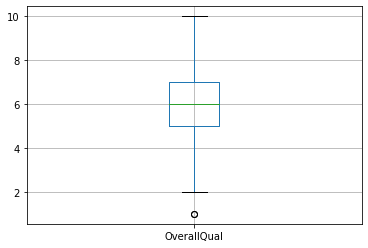

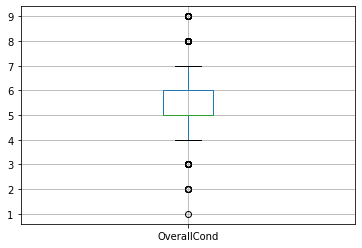

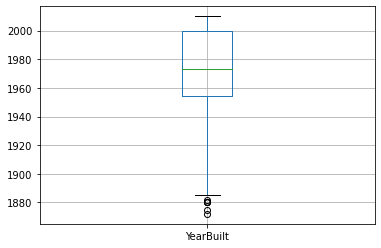

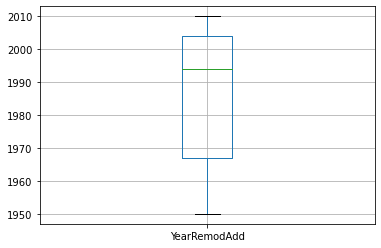

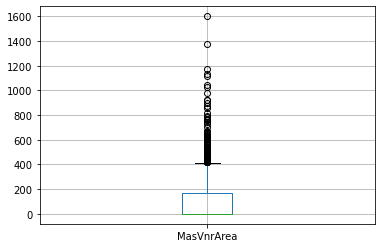

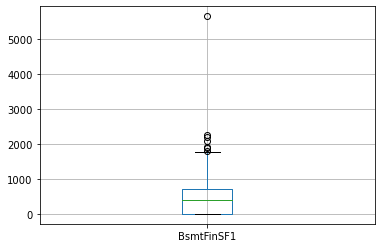

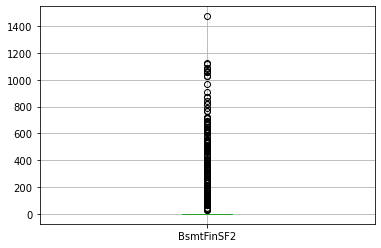

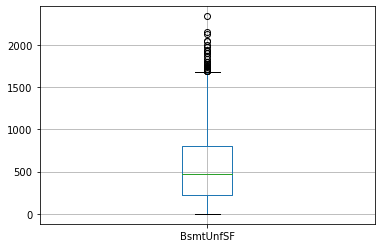

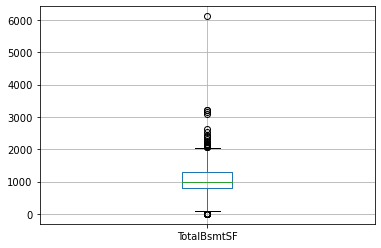

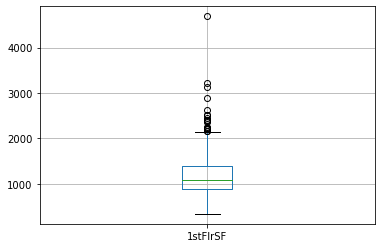

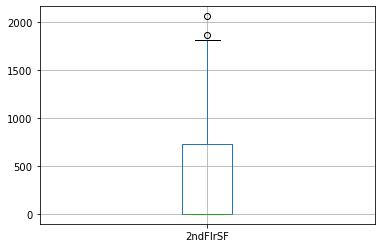

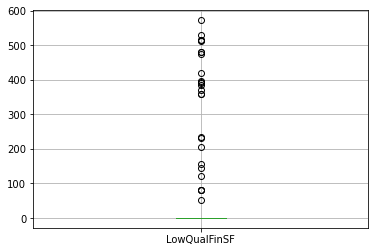

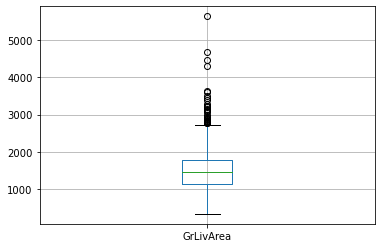

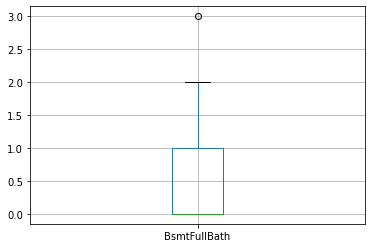

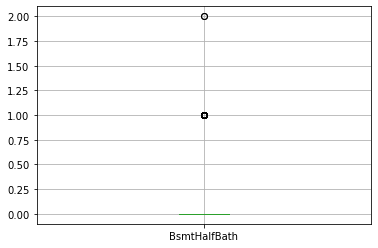

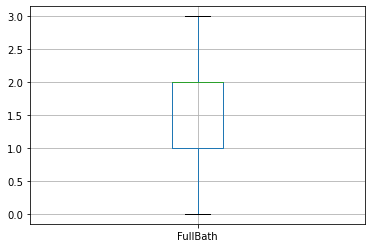

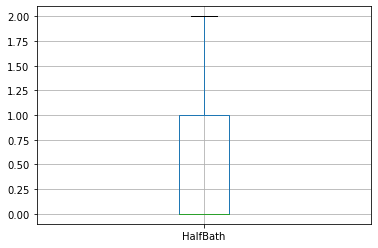

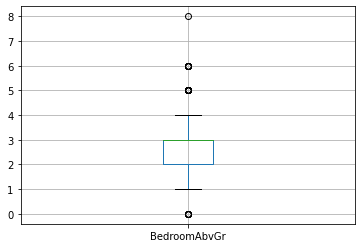

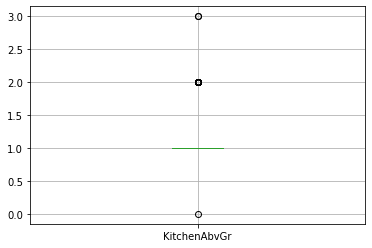

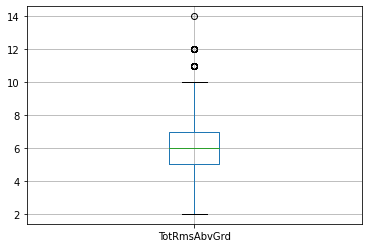

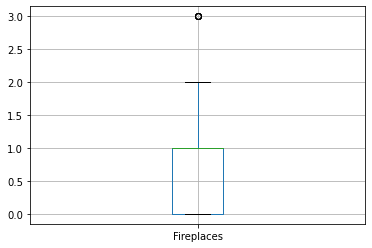

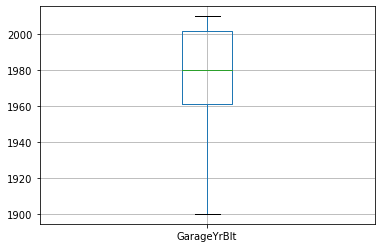

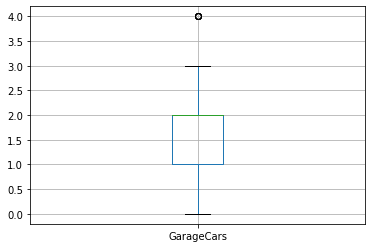

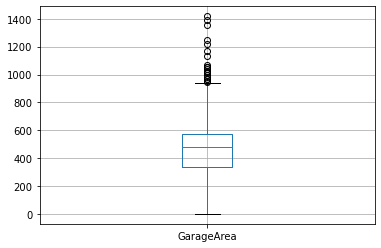

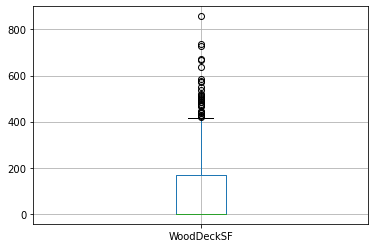

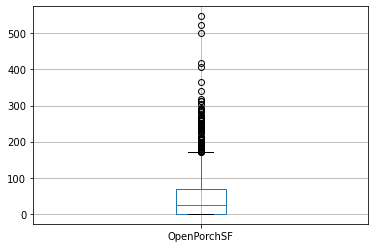

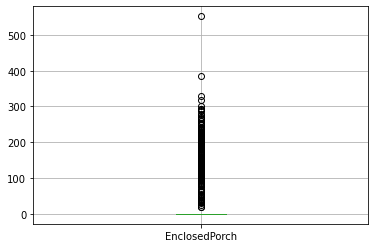

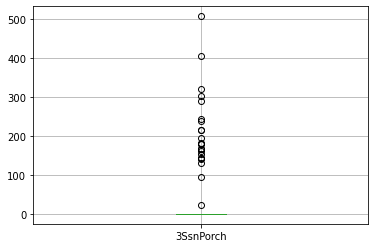

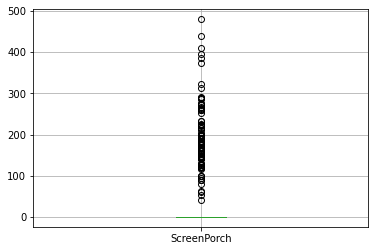

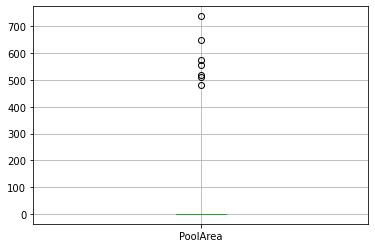

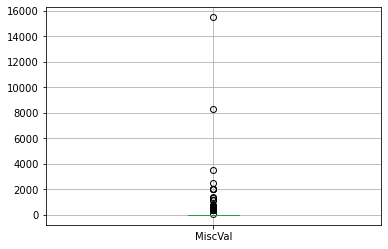

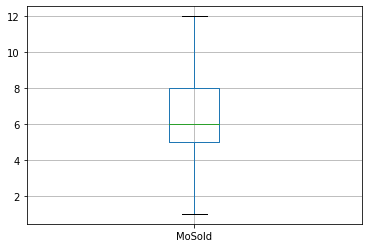

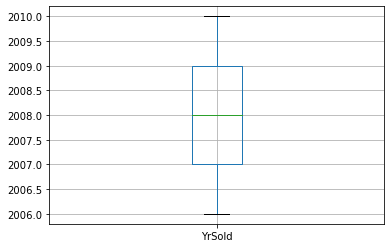

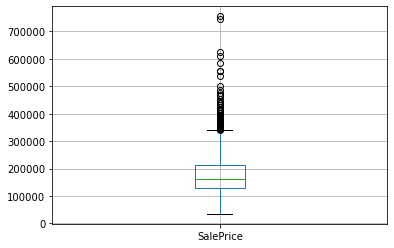

In [21]:
#Create boxplots
for column in housing.select_dtypes(exclude = ["object"]).columns:
    plt.figure()
    housing.boxplot([column])